In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

## 加载数据

In [2]:
columns=["user_id","order_dt","order_products","order_amount"]
df = pd.read_csv("CDNOW_master.txt", names=columns, sep="\s+")

In [3]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [5]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


## 数据清理

In [6]:
# 是否有空缺值
df.isna().sum()

user_id           0
order_dt          0
order_products    0
order_amount      0
dtype: int64

In [7]:
# 同一个用户在当天可以购物不同次数，重复值无需删除
df.duplicated().sum()

255

In [8]:
# 转换为时间数据类型
df["order_date"] = pd.to_datetime(df.order_dt, format="%Y%m%d")

In [9]:
# 增加新列--月份
df["month"]=df.order_date.values.astype("datetime64[M]")

In [10]:
df.head()

,user_id,order_dt,order_products,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
order_date        69659 non-null datetime64[ns]
month             69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


## 数据分析

In [14]:
# 从用户角度分析
user_grouped = df.groupby("user_id").sum()
user_grouped.head()

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [15]:
user_grouped.describe()

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


数据洞察：用户平均购买7张CD，最多的用户购买了1033张；客单价为106，标准差240，平均值大于中位数，和75分位接近，数据右偏，存在小部分的高额消费用户

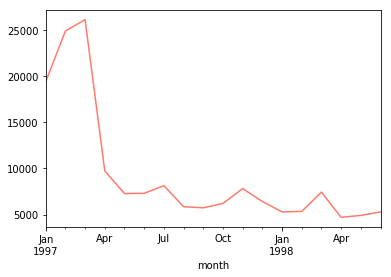

In [19]:
# 月总订单趋势
df.groupby("month").order_products.sum().plot(color="#ff796c")

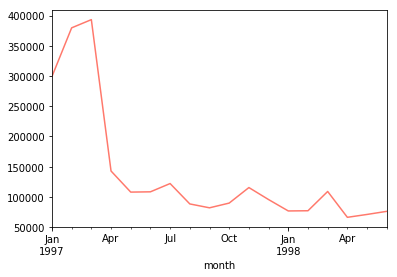

In [20]:
# 月总销售额趋势
df.groupby("month").order_amount.sum().plot(color="#ff796c")

### 描述数据：三月份月订单与销售额骤降，之后趋于平稳
### 分析原因
#### 提出假设1：早期存在异常用户
#### 进行数据验证

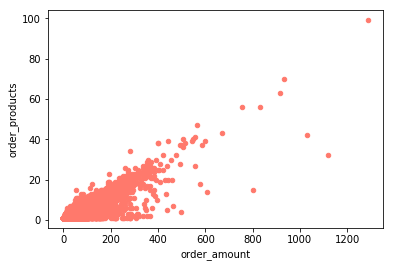

In [25]:
# 每笔订单的散点图
df.plot.scatter(x='order_amount', y='order_products', color="#ff796c")

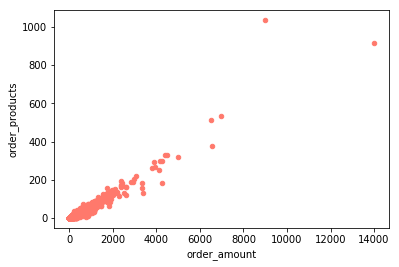

In [27]:
# 用户订单的散点图
df.groupby("user_id").sum().plot.scatter(x="order_amount",y="order_products", color="#ff796c")

#### 订单与用户都比较健康，假设1不成立

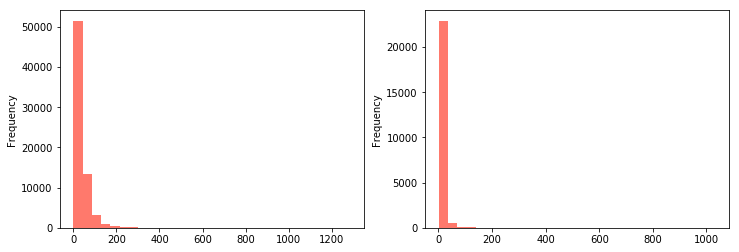

In [32]:
# 用户消费行为分布
plt.figure(figsize=(12, 4))
plt.subplot(121)
df.order_amount.plot.hist(bins=30, color="#ff796c")

plt.subplot(122)
df.groupby("user_id").order_products.sum().plot.hist(bins=30, color="#ff796c")

大部分用户的消费能力并不强，符合消费行为的行业规律

In [34]:
# 观察用户消费时间段
df.groupby("user_id").month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

用户首次消费月集中在前三个月

In [35]:
df.groupby("user_id").month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

用户最后一次消费时间，绝大部分数据依然集中在前三个月，后续时间段内，依然有用户在消费，但是缓慢减少

### 分析复购率和回购率

In [40]:
pivoted_counts=df.pivot_table(index="user_id", columns="month"
               ,values="order_dt",aggfunc="count").fillna(0)
columns_month=df.month.sort_values().astype("str").unique()
pivoted_counts.columns=columns_month

pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


#### 复购率的定义是在某个事件窗口内消费两次及以上的用户在总消费用户中占比，消费两次及以上记为1， 消费一次记为0，没有消费为NaN

In [41]:
pivoted_counts_transf=pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [45]:
repeat_purchase_rate=pivoted_counts_transf.sum() / pivoted_counts_transf.count()
repeat_purchase_rate

1997-01-01    0.107571
1997-02-01    0.122288
1997-03-01    0.155292
1997-04-01    0.223600
1997-05-01    0.196929
1997-06-01    0.195810
1997-07-01    0.215138
1997-08-01    0.200339
1997-09-01    0.202415
1997-10-01    0.206634
1997-11-01    0.202170
1997-12-01    0.219957
1998-01-01    0.210800
1998-02-01    0.203095
1998-03-01    0.229612
1998-04-01    0.199026
1998-05-01    0.200269
1998-06-01    0.214475
dtype: float64

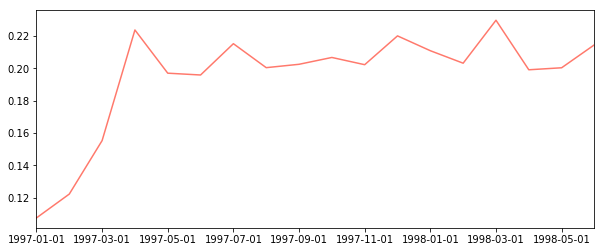

In [46]:
plt.figure(figsize=(10,4))
repeat_purchase_rate.plot(color='#ff796c')

早期大量新用户加入，新客复购率并不高，1月复购率只有6%左右，而在后期，用户都是老客，复购率比较稳定，在20%左右。新客和老客，复购率有三倍左右的差距。

### 回购率的定义是某个时间窗口内消费的用户，在下一个时间窗口仍然消费的占比。

In [61]:
pivoted_amount=df.pivot_table(index="user_id", columns="month"
               ,values="order_amount",aggfunc="mean").fillna(0)
columns_month=df.month.sort_values().astype("str").unique()
pivoted_amount.columns=columns_month

pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [62]:
pivoted_purchase = pivoted_amount.applymap(lambda x: 1 if x>0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [71]:
def purchase_return(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1]==1:
                status.append(1)
            if data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,index=columns_month)

pivoted_purchase_return = pivoted_purchase.apply(purchase_return,axis=1) #axis=1表示横向
pivoted_purchase_return.head(5)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


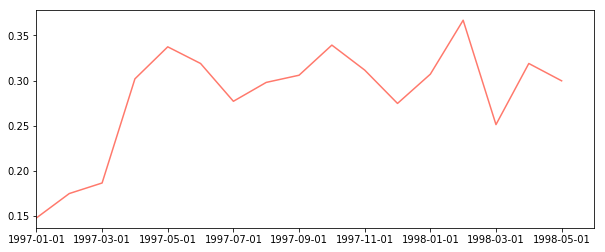

In [73]:
(pivoted_purchase_return.sum() / pivoted_purchase_return.count()).plot(figsize=(10, 4), color='#ff796c')

用户的回购率高于复购率，约在30%左右，波动性较强。新用户的回购率在15%左右，和老客差异不大。
综合分析，CDNow网站的用户消费特征为，新客的整体质量低于老客，老客的忠诚度表现较好

### 用户分层

In [75]:
def active_status(data):
    status=[]
    for i in range(18):
        
        #如果本月没有消费
        if data[i] == 0:
            if len(status) > 0: #如果不是第一个月
                if status[i-1] == "unreg": #如果上个月为注册，那个这个月也是未注册
                    status.append("unreg")
                else: #如果上个月已经注册，这个月是不活跃
                    status.append("unactive")
            else: #如果是第一个月，则是未注册
                status.append("unreg")
        
        #如果本月消费
        else:
            if len(status) == 0: #如果是第一个月消费，则是新用户
                status.append("new")
            else:
                if status[i-1] =="unactive":
                    status.append("return")
                elif status[i-1] == "unreg":
                    status.append("new")
                else:
                    status.append("active")
    return pd.Series(status, index=columns_month)

pivoted_purchase_status = pivoted_purchase.apply(lambda x:active_status(x), axis = 1)
pivoted_purchase_status.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [76]:
purchase_status_counts = pivoted_purchase_status.replace("unreg", np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


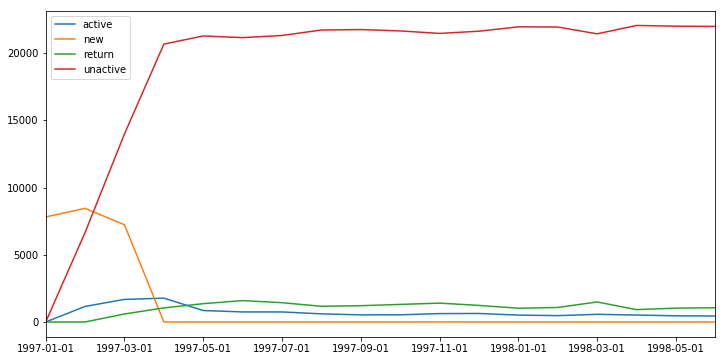

In [77]:
purchase_status_counts.fillna(0).T.plot(figsize=(12, 6))

### 用户质量分析

In [78]:
user_amount = df.groupby("user_id").order_amount.sum().sort_values().reset_index()
user_amount["amount_cumsum"] = user_amount.order_amount.cumsum()
amount_total =user_amount.amount_cumsum.max()
user_amount["prop"] = user_amount.apply(lambda x:x.amount_cumsum / amount_total, axis=1)
user_amount.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


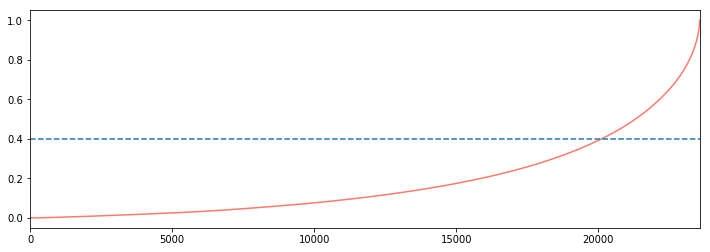

In [86]:
ax = user_amount.prop.plot(figsize=(12,4), color="#ff796c")
ax.axhline(y =0.4, linestyle="--")

前20000个用户贡献了40%的消费，后面4000个用户贡献了60%的消费，呈现二八倾向

### 分析用户生命周期

In [87]:
user_purchase = df[["user_id","order_products","order_amount","order_date"]]
order_date_min = user_purchase.groupby("user_id").order_date.min()
order_date_max = user_purchase.groupby("user_id").order_date.max()
(order_date_max - order_date_min).mean()

Timedelta('134 days 20:55:36.987696')

所用用户平均生命周期为134天，但是平均数并不靠谱，看一下分布

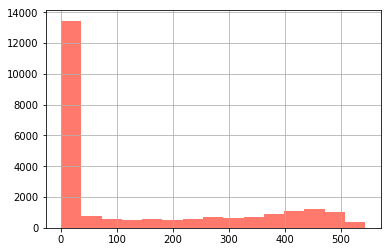

In [89]:
((order_date_max - order_date_min)/np.timedelta64(1, 'D')).hist(bins=15, color="#ff796c")

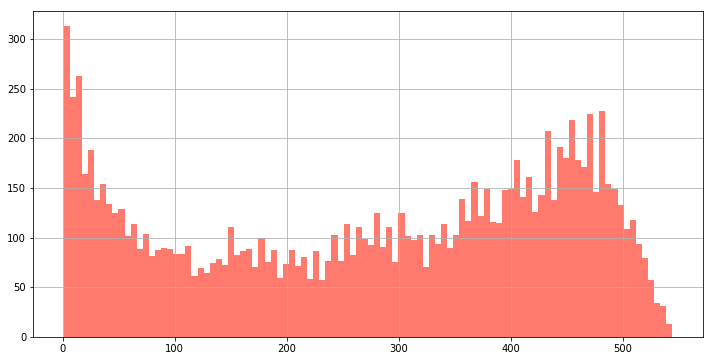

In [92]:
life_time = (order_date_max - order_date_min).reset_index()
life_time["life_time"] = life_time.order_date / np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins= 100, figsize=(12,6), color="#ff796c")

In [93]:
life_time[life_time.life_time>0].life_time.mean()

276.0448072247308

消费两次以上的用户生命周期是276天

### 计算留存率

In [96]:
user_purchase_retention = pd.merge(left=user_purchase, right=order_date_min.reset_index()
                                  ,how ="inner", on="user_id"
                                  ,suffixes=("", "_min"))
user_purchase_retention["order_date_diff"]=user_purchase_retention.order_date - user_purchase_retention.order_date_min
user_purchase_retention["date_diff"]=user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D'))
user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff,date_diff
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0


In [108]:
# 时间差值分箱
bin =[0, 3, 7, 15, 30,60, 90, 180, 365]
user_purchase_retention["date_diff_bin"] = pd.cut(user_purchase_retention.date_diff, bins=bin)
user_purchase_retention.head()

,user_id,order_products,order_amount,order_date,order_date_min,order_date_diff,date_diff,date_diff_bin
0,1,1,11.77,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,1,12.00,1997-01-12,1997-01-12,0 days,0.0,NaN
2,2,5,77.00,1997-01-12,1997-01-12,0 days,0.0,NaN
3,3,2,20.76,1997-01-02,1997-01-02,0 days,0.0,NaN
4,3,2,20.76,1997-03-30,1997-01-02,87 days,87.0,"(60.0, 90.0]"


In [110]:
#用户第一次消费后，在后续时间段内的消费总额
pivoted_retention = user_purchase_retention.pivot_table(index="user_id", columns="date_diff_bin"
                                                       , values="order_amount", aggfunc=sum, dropna=False)
pivoted_retention.head(10)

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.90,NaN,110.40,155.54
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.43
8,NaN,NaN,NaN,NaN,13.97,NaN,45.29,104.17
9,NaN,NaN,NaN,NaN,NaN,NaN,30.33,NaN


In [111]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [112]:
pivoted_rention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x>0 else 0)
pivoted_rention_trans.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,1,1


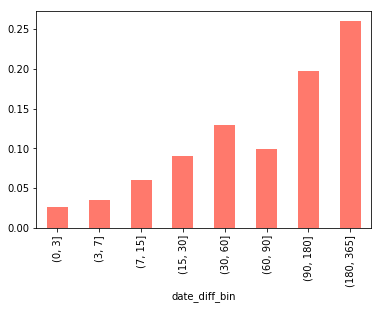

In [114]:
(pivoted_rention_trans.sum() / pivoted_rention_trans.count()).plot.bar(color="#ff796c")

### 用户消费间隔分布

3%的用户在3~7天内有过消费，20%的用户在第一次消费后三个月到半年之间有过购买，27%的用户在半年后到一年内有过购买。

In [116]:
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    return d

last_diff = user_purchase_retention.groupby("user_id").apply(diff)
last_diff.head(10)

user_id   
1        0      NaN
2        1      0.0
         2      NaN
3        3    -87.0
         4     -3.0
         5   -227.0
         6    -10.0
         7   -184.0
         8      NaN
4        9    -17.0
Name: date_diff, dtype: float64

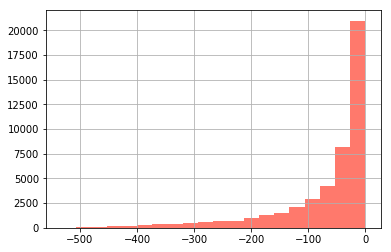

In [118]:
last_diff.hist(bins=20, color="#ff796c")

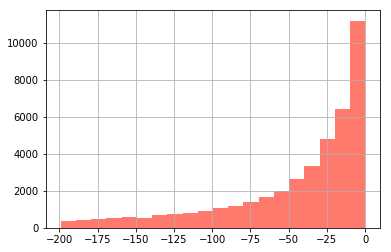

In [119]:
last_diff[last_diff>-200].hist(bins=20, color="#ff796c")

In [120]:
last_diff.mean()

-68.97376814424265